### Import Packages

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline

### Load image list

In [2]:
IMG_DIR = "img_test"

images_in_dir = os.listdir(IMG_DIR)

# add paths
image_path_list = []
for i in images_in_dir:
    image_path_list.append(os.path.join(IMG_DIR, i))

### Inception V3 Confusion matrix

#### Load results from pickles

In [3]:
pickle_dir = "inception_pickled"
ground_truth_file = os.path.join(pickle_dir, "ground_truth.pickle")
prediction_file = os.path.join(pickle_dir, "inception_predition.pickle") # yeah file name typo :(

In [4]:
def load_from_pickle(pickle_file):
    file_handle = open(pickle_file, "rb")
    data_pickled = pickle.load(file_handle)
    
    file_handle.close()
    return data_pickled

In [5]:
ground_truth = load_from_pickle(ground_truth_file)
predictions = load_from_pickle(prediction_file)

#### Arrays for true and predicted values of confusion matrix

Some files may not be inferrable yet exist in the dir. So we need to create an acceptable file list and pickle it.

In [6]:
y_true = []
y_pred = []
ac_file_list = []

# load the arrays
for image_path in image_path_list:
    try:
        y_true.append(ground_truth[image_path])
        y_pred.append(predictions[image_path])
        ac_file_list.append(image_path)
    except KeyError as e:
        pass


In [7]:
len(ac_file_list)

1051

So the test image set has **1051** files

#### Confusion Matrix

In [8]:
conf_mat = confusion_matrix(y_true, y_pred)

In [9]:
print(conf_mat)
print(conf_mat.shape)

[[215   1   4   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0]
 [  0   0   0   7   0   0   2   0]
 [  0   0   0   4  77   0   0   0]
 [  0  22   0  30   2 270   0   0]
 [  1   3   0   1   0   0 200   1]
 [  1   4   0  13  34   0  17 139]]
(8, 8)


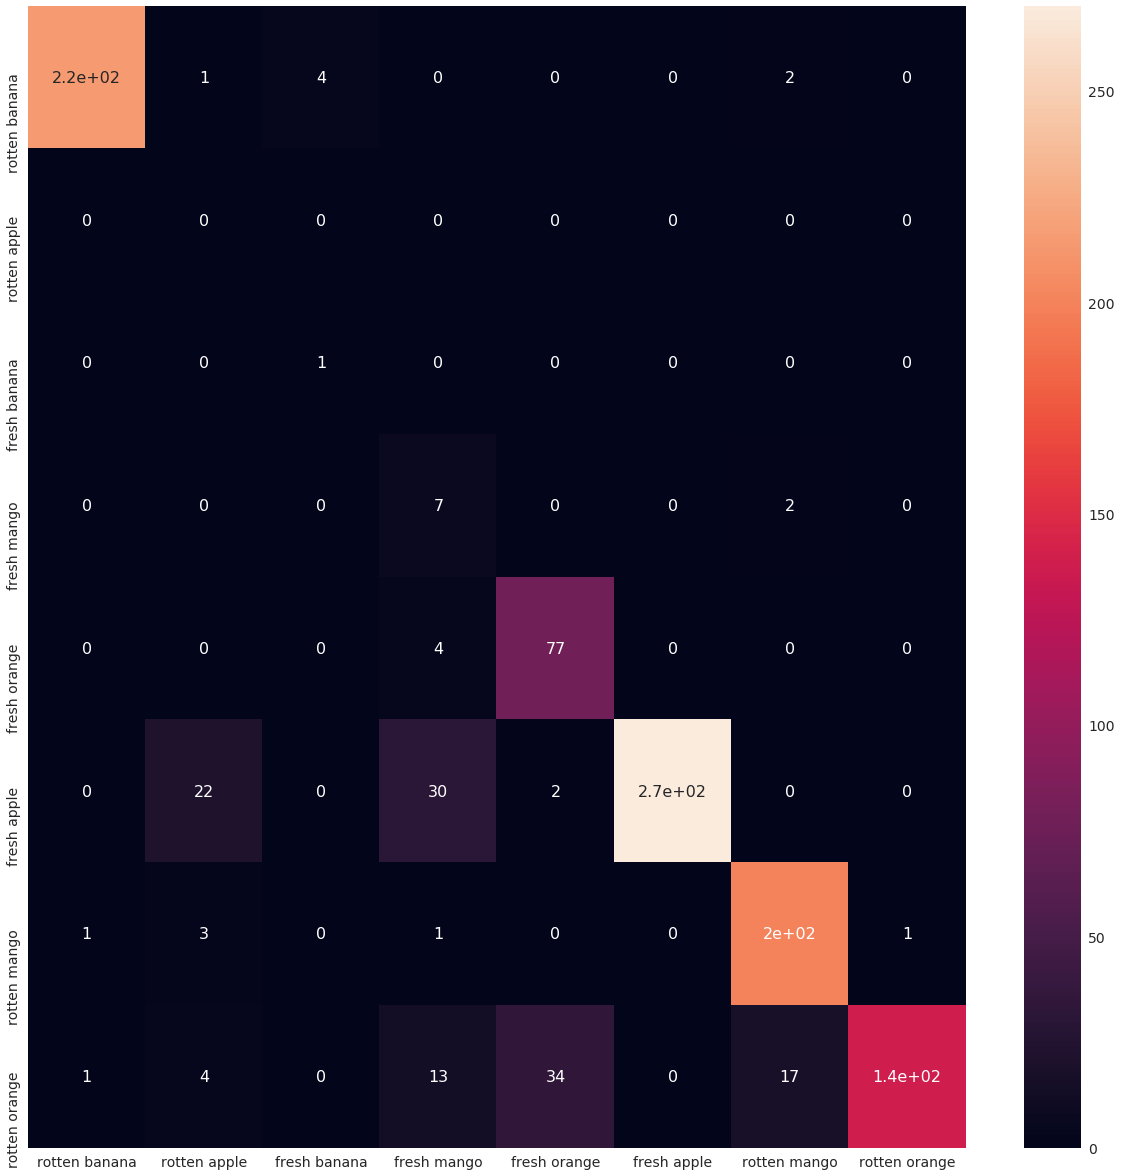

In [10]:
#labels = [ i for i in range(8) ]
labels = [ "rotten banana", "rotten apple", "fresh banana", "fresh mango", "fresh orange", "fresh apple",
         "rotten mango", "rotten orange"]

df_cm = pd.DataFrame(conf_mat, index = labels,
                columns = labels)
plt.figure(figsize = (21,21))
# sn.heatmap(df_cm, annot=True)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

plt.show()

In [11]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.8648905804


#### Precision Recall

In [12]:
# recall
# multi class recall
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# For each class


y_true = label_binarize(y_true, classes=[x for x in range(8)])
y_pred = label_binarize(y_pred, classes=[x for x in range(8)])

n_classes = y_true.shape[1]


precision = dict()
recall = dict()
average_precision = dict()


# runs
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_true[:, i], y_pred[:, i])
    

precision["micro"], recall["micro"], _ = precision_recall_curve(y_true.ravel(),
    y_pred.ravel())
    
average_precision["micro"] = average_precision_score(y_true, y_pred,
                                                     average="micro")


# log
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.76


/home/shawon/anaconda3/envs/cse499/lib/python3.5/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


#### Plotting precision recall

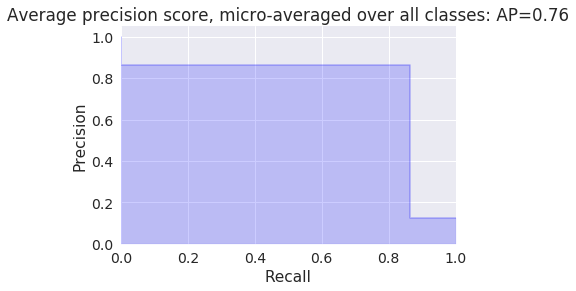

In [13]:
# plot

plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))


plt.show()

#### Classwise curves

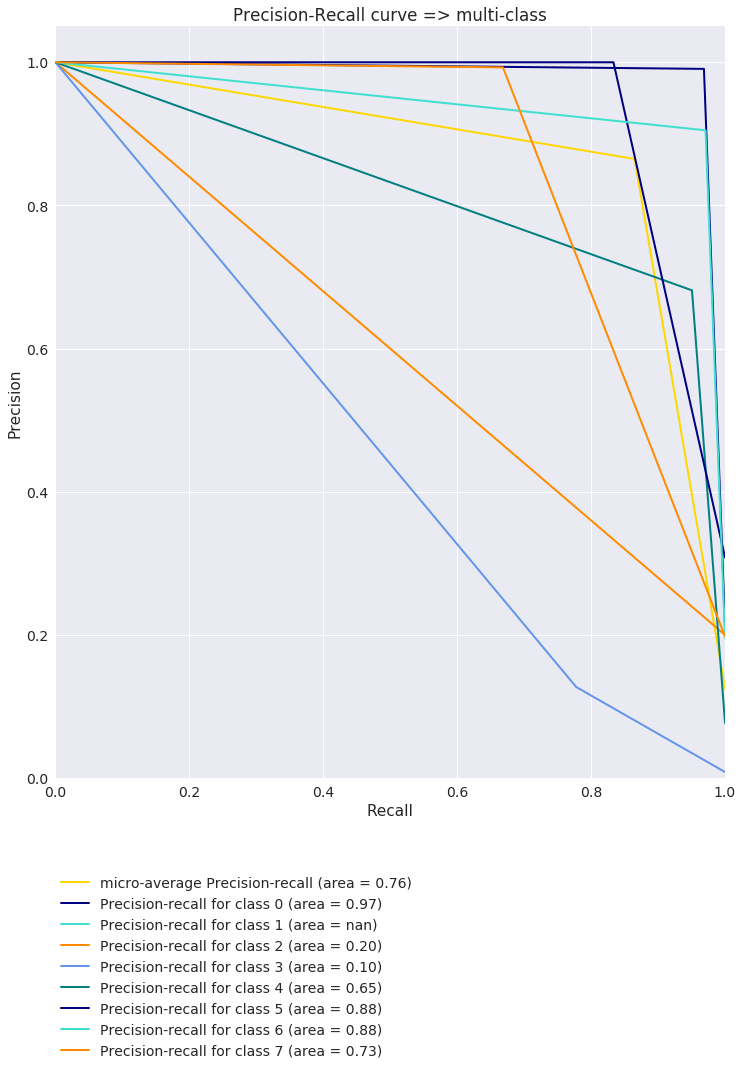

In [14]:
class_labels = labels


from itertools import cycle
import numpy as np
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(12, 12))
f_scores = np.linspace(0.2, 0.8, num=8)
lines = []
labels = []

l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.01)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve => multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

#### Class info :

In [24]:
for i in range(len(class_labels)):
    print("Class : {} => Label : {}".format(i, class_labels[i]))

Class : 0 => Label : rotten banana
Class : 1 => Label : rotten apple
Class : 2 => Label : fresh banana
Class : 3 => Label : fresh mango
Class : 4 => Label : fresh orange
Class : 5 => Label : fresh apple
Class : 6 => Label : rotten mango
Class : 7 => Label : rotten orange


### VGG16 Scratch Confusion Matrix

#### Load data from pickles

In [15]:
pickle_root = "vgg16_scratch_pickle"
gt = load_from_pickle(os.path.join(pickle_root, "vgg16_s_ground.pickle"))
pred = load_from_pickle(os.path.join(pickle_root, "vgg16_s_err.pickle"))

#### Confusion Metrics

In [16]:
y_true = []
y_pred = []

# load the arrays
keyList = list(gt.keys())
for key in keyList:
    # excluding png images for now
    if key in gt and key in pred:
        y_true.append(gt[key])
        y_pred.append(pred[key])
        

In [17]:
conf_mat = confusion_matrix(y_true, y_pred)
print(conf_mat)

[[407   7]
 [439 196]]


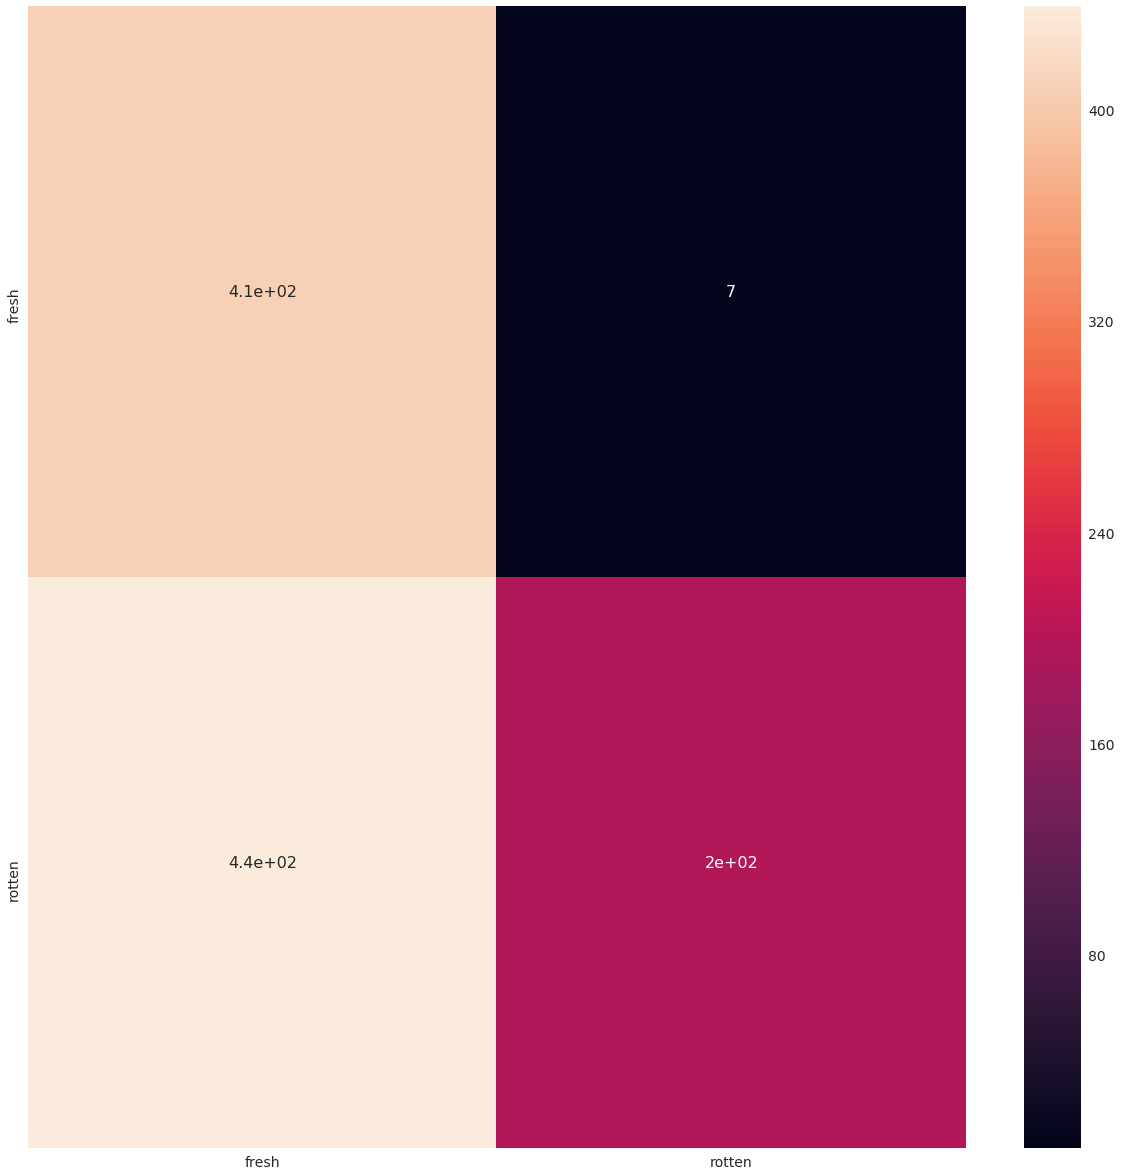

In [18]:
labels = [ "fresh", "rotten" ]

df_cm = pd.DataFrame(conf_mat, index = labels,
                columns = labels)
plt.figure(figsize = (21,21))
# sn.heatmap(df_cm, annot=True)
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

plt.show()

In [19]:
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.574833174452


In [20]:
# precision recall

avg_prec_score = average_precision_score(y_true, y_pred)
print("Average precision recall score : {0:.02f}".format(avg_prec_score))

Average precision recall score : 0.72


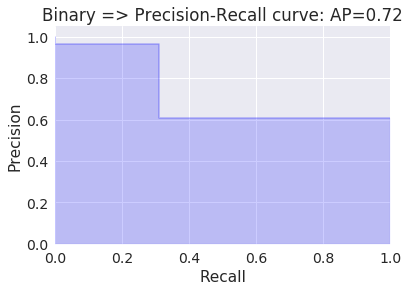

In [21]:
#precision recall curve


precision, recall, _ = precision_recall_curve(y_true, y_pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Binary => Precision-Recall curve: AP={0:0.2f}'.format(
          avg_prec_score))

plt.show()